In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [3]:
#Import the image (need to change the path to the one where LOLA.jpg was downloaded) and its b&w version
LOLA = mpimg.imread(os.path.join('C:\\Users\\SE79065\\Documents\\CompressiveSensing\\images\\LOLA.jpg'))
BW = np.mean(LOLA,-1) #to deal only with one color channel

(1600, 1471, 3)

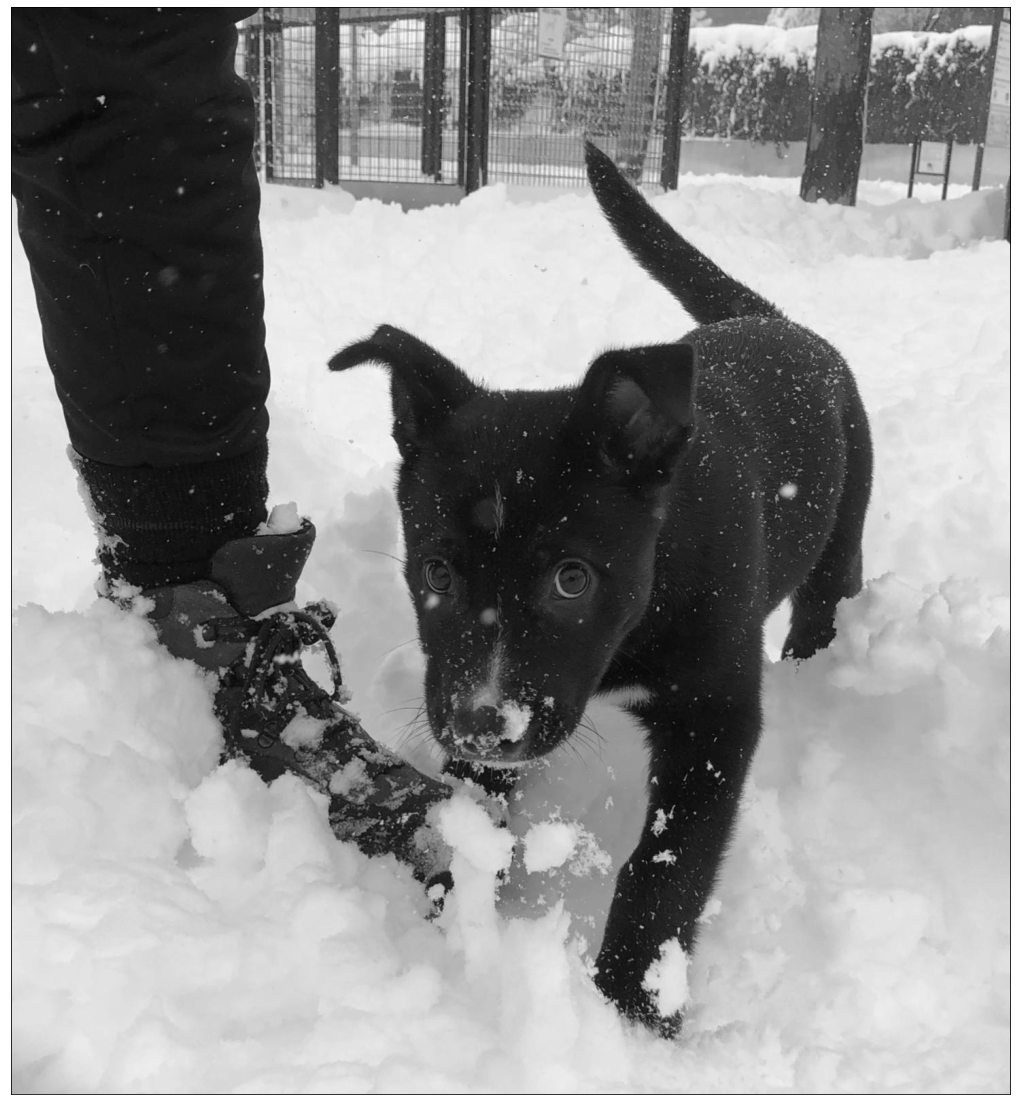

<Figure size 1440x1440 with 0 Axes>

In [5]:
plt.imshow(LOLA[:,:,1],cmap = 'gray',vmin=0,vmax=255)
plt.xticks([])
plt.yticks([])
fig = plt.figure(figsize=(20,20))
plt.show()

In [8]:
##Wavelet decomposition
n=2 #number of levels for the decomp.
w = 'db1'#Daubechies wavelets
coeffs = pywt.wavedec2(BW, wavelet=w, level=n)

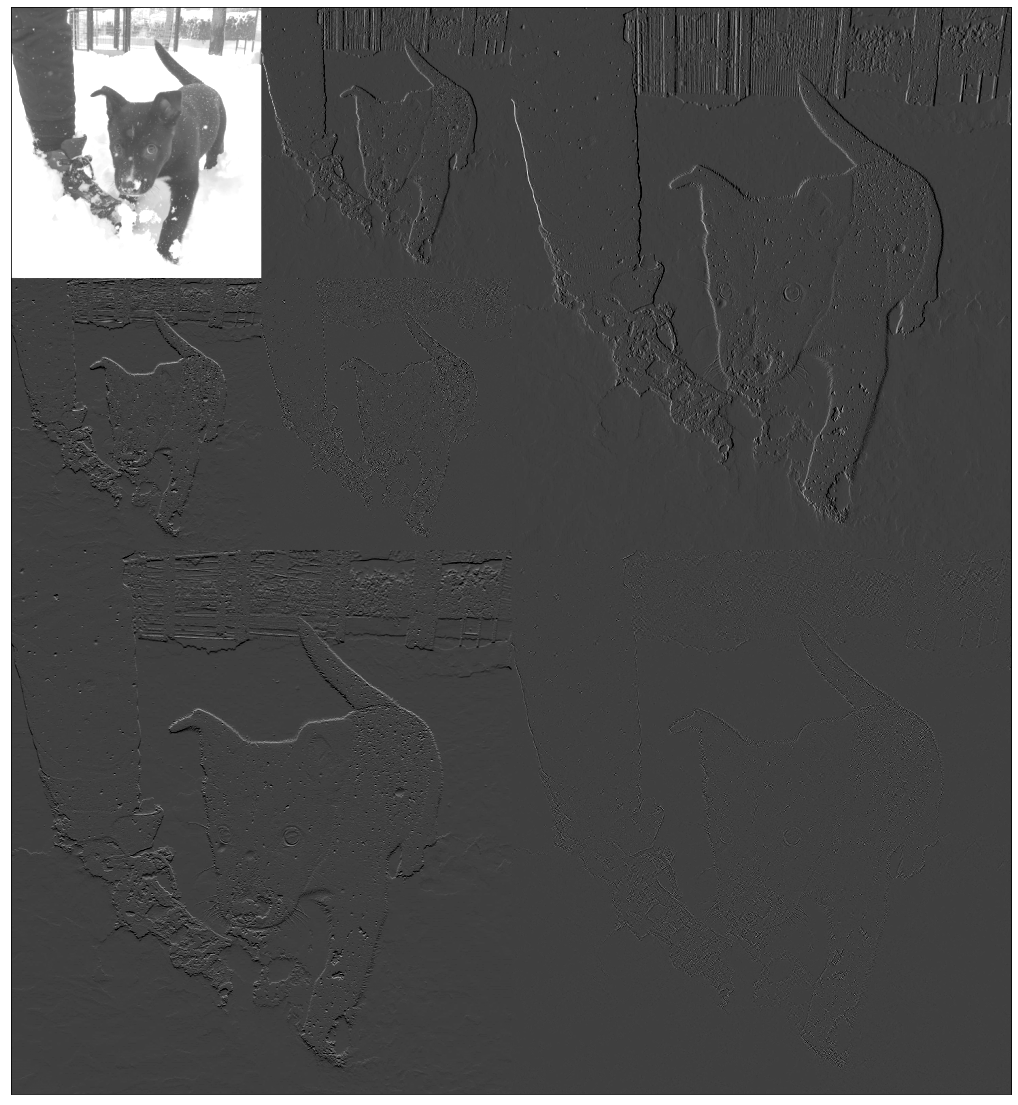

<Figure size 1440x1440 with 0 Axes>

In [9]:
#Display in the Daubechies domain
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level+1]=[d/np.abs(d).max() for d in coeffs[detail_level+1]]

arr, coeffs_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr,cmap = 'gray',vmin=-0.25,vmax=0.75)
plt.xticks([])
plt.yticks([])
plt.rcParams['figure.figsize'] = [20,20]
fig = plt.figure(figsize=(20,20))
plt.show()

In [10]:
#Wavelet compression
n=4 #number of levels for the decomp.
w = 'db1' #Daubechies wavelets
coeffs = pywt.wavedec2(BW,wavelet=w,level=n)

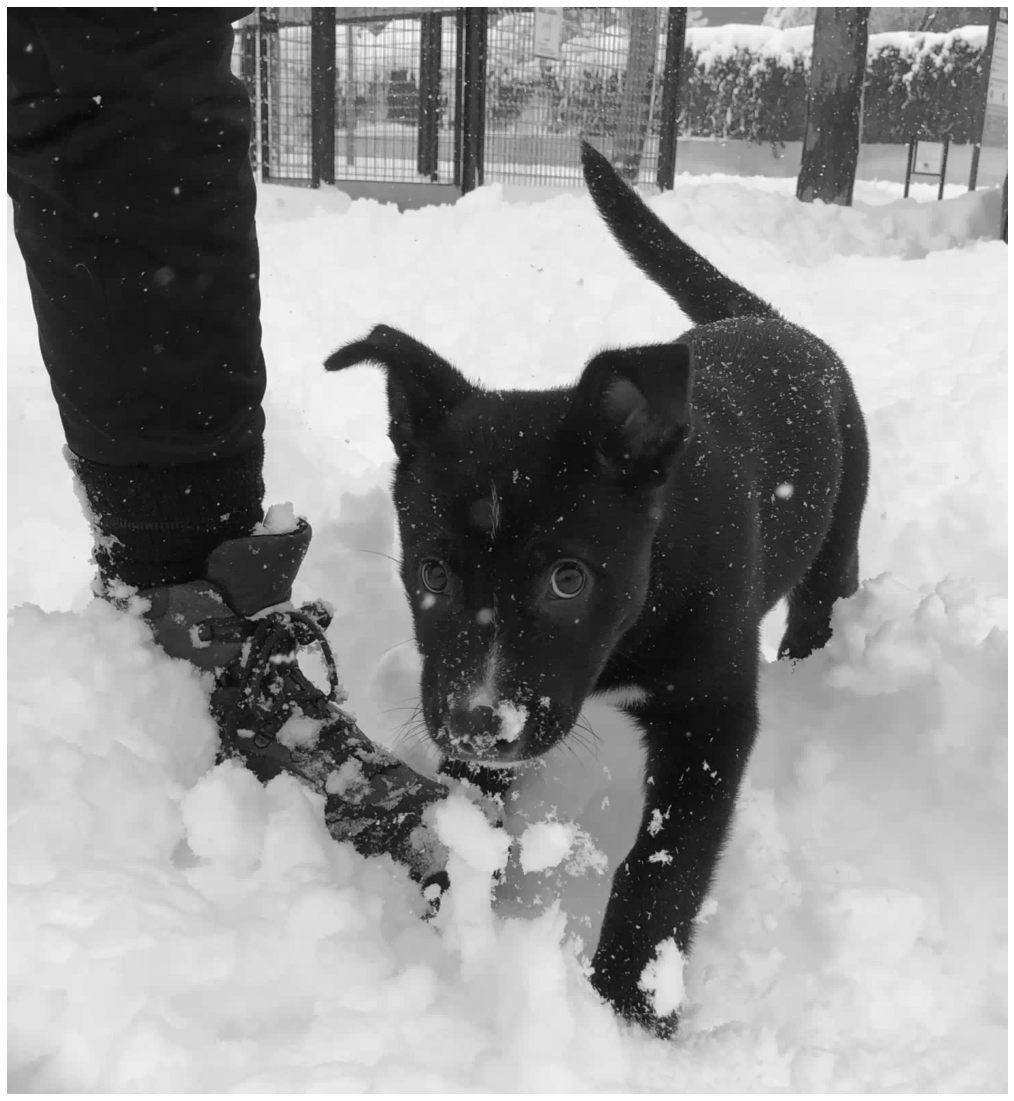

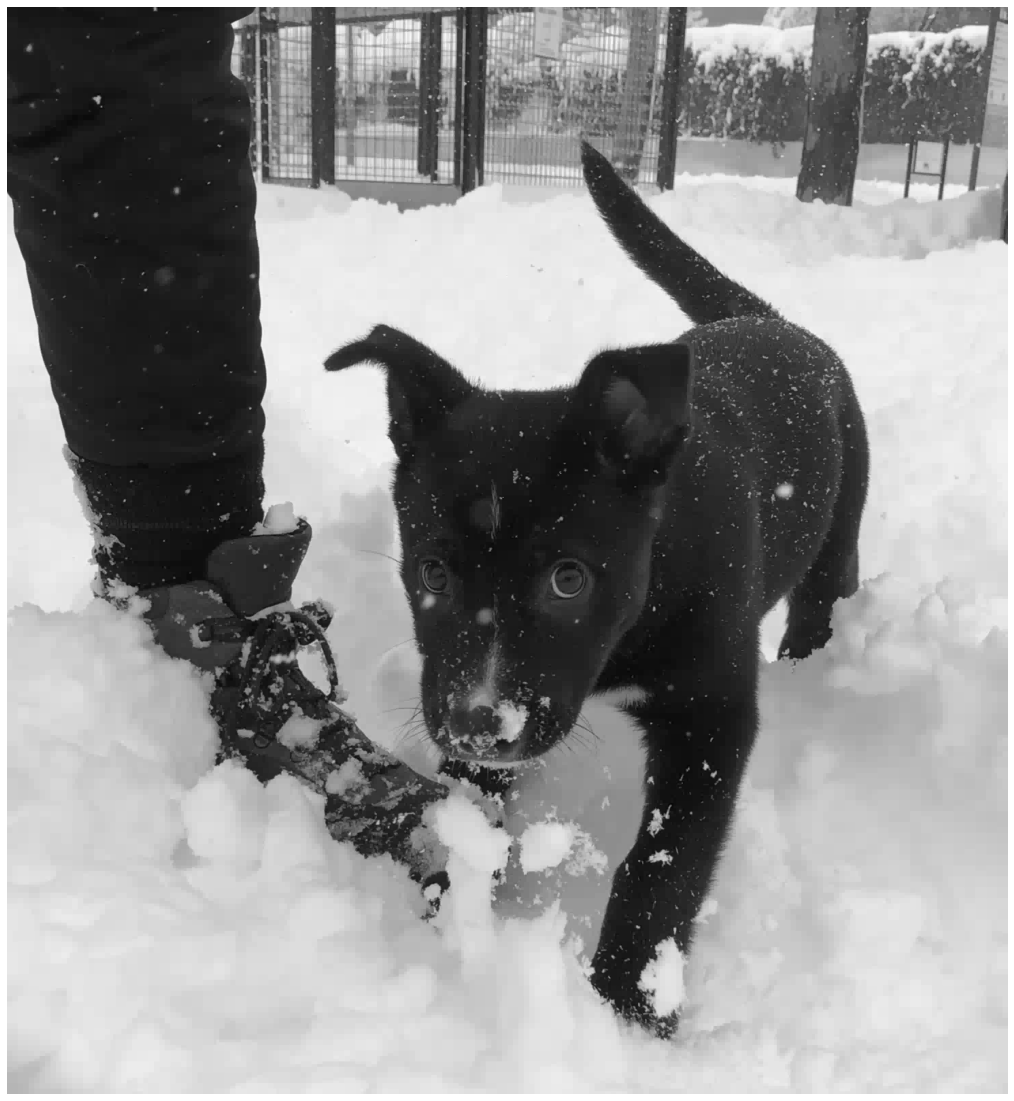

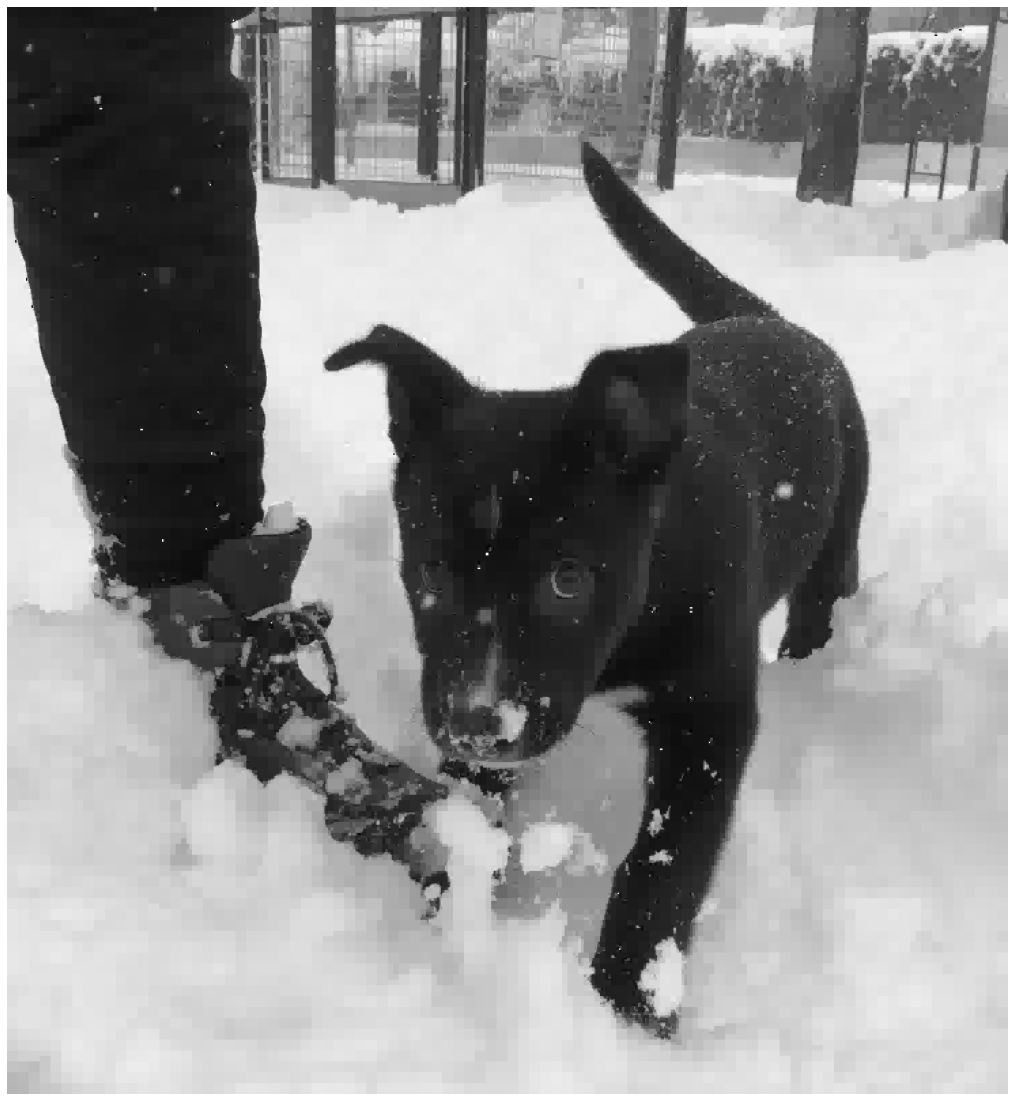

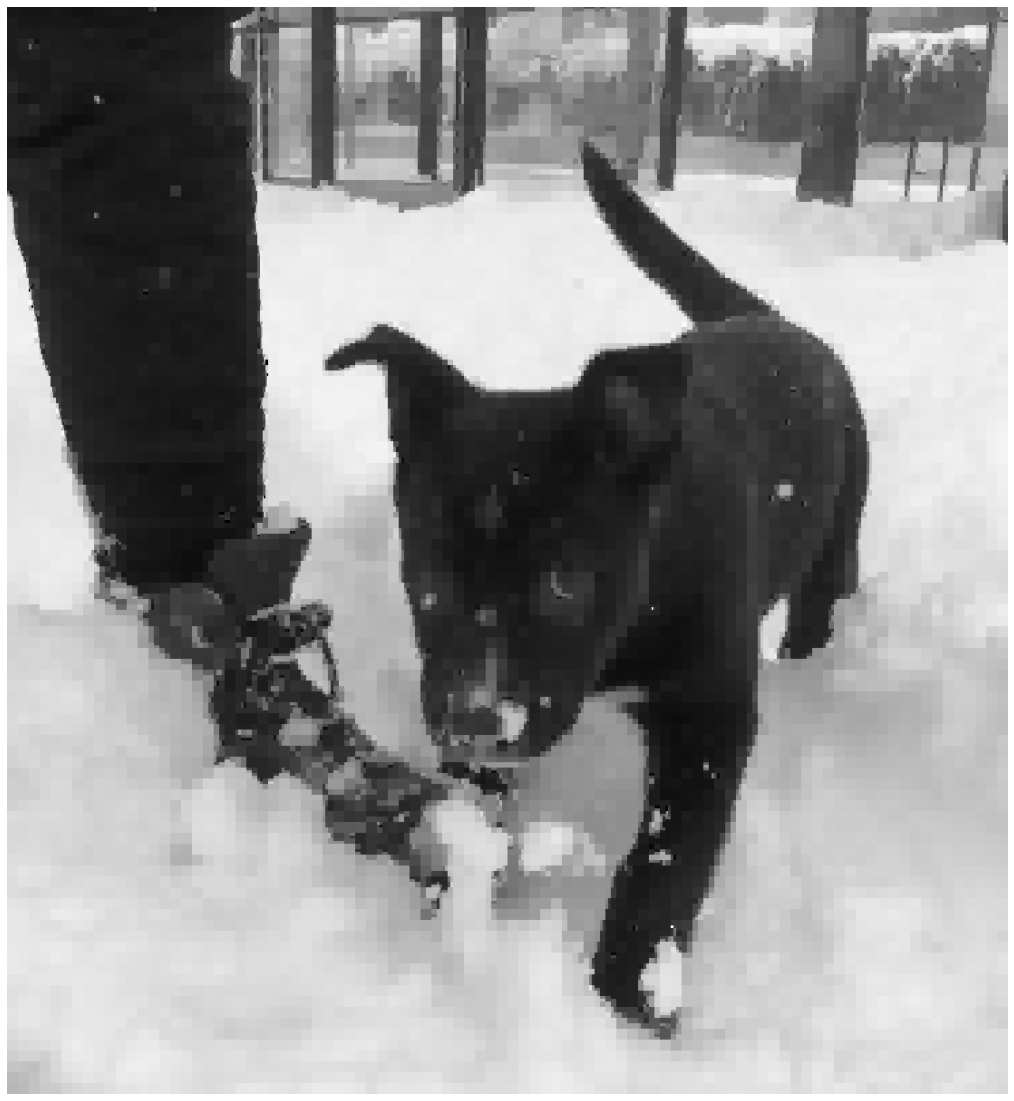

In [11]:
#Display the recovery maintaining diferent porcentages of the coefficients.
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
for keep in (0.1,0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr*ind 
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

    #Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    
    